## Family Level Comparison 

In [5]:
suppressPackageStartupMessages({
    library(tidyverse)
    library(reshape2)
    library(ggpubr)
    library(matrixStats)
})

In [6]:
df = read.csv("all_samples_fam.csv")

In [7]:
df[1:5,1:5]

taxa               V1V2_HNO17_S8_R1 V1V2_HNO19_S9_R1 V1V2_HNO209_S14_R1
1 Acholeplasmataceae  0               0                0                 
2 Actinomycetaceae   11               9                5                 
3 Aerococcaceae       1               1                0                 
4 Akkermansiaceae     1               0                0                 
5 Alteromonadaceae    0               0                0                 
  V1V2_HNO223_S15_R1
1 0                 
2 5                 
3 1                 
4 0                 
5 0

In [8]:
df = df[ !grepl( 'POS|NEG', colnames(df))]

In [9]:
df2_mat = as.matrix( df[-1])
rownames(df2_mat) = df$taxa

In [10]:
df2_mat[1:5,1:5]

V1V2_HNO17_S8_R1 V1V2_HNO19_S9_R1 V1V2_HNO209_S14_R1
Acholeplasmataceae  0               0                0                 
Actinomycetaceae   11               9                5                 
Aerococcaceae       1               1                0                 
Akkermansiaceae     1               0                0                 
Alteromonadaceae    0               0                0                 
                   V1V2_HNO223_S15_R1 V1V2_HNO23_S10_R1
Acholeplasmataceae 0                  0                
Actinomycetaceae   5                  6                
Aerococcaceae      1                  1                
Akkermansiaceae    0                  0                
Alteromonadaceae   0                  0

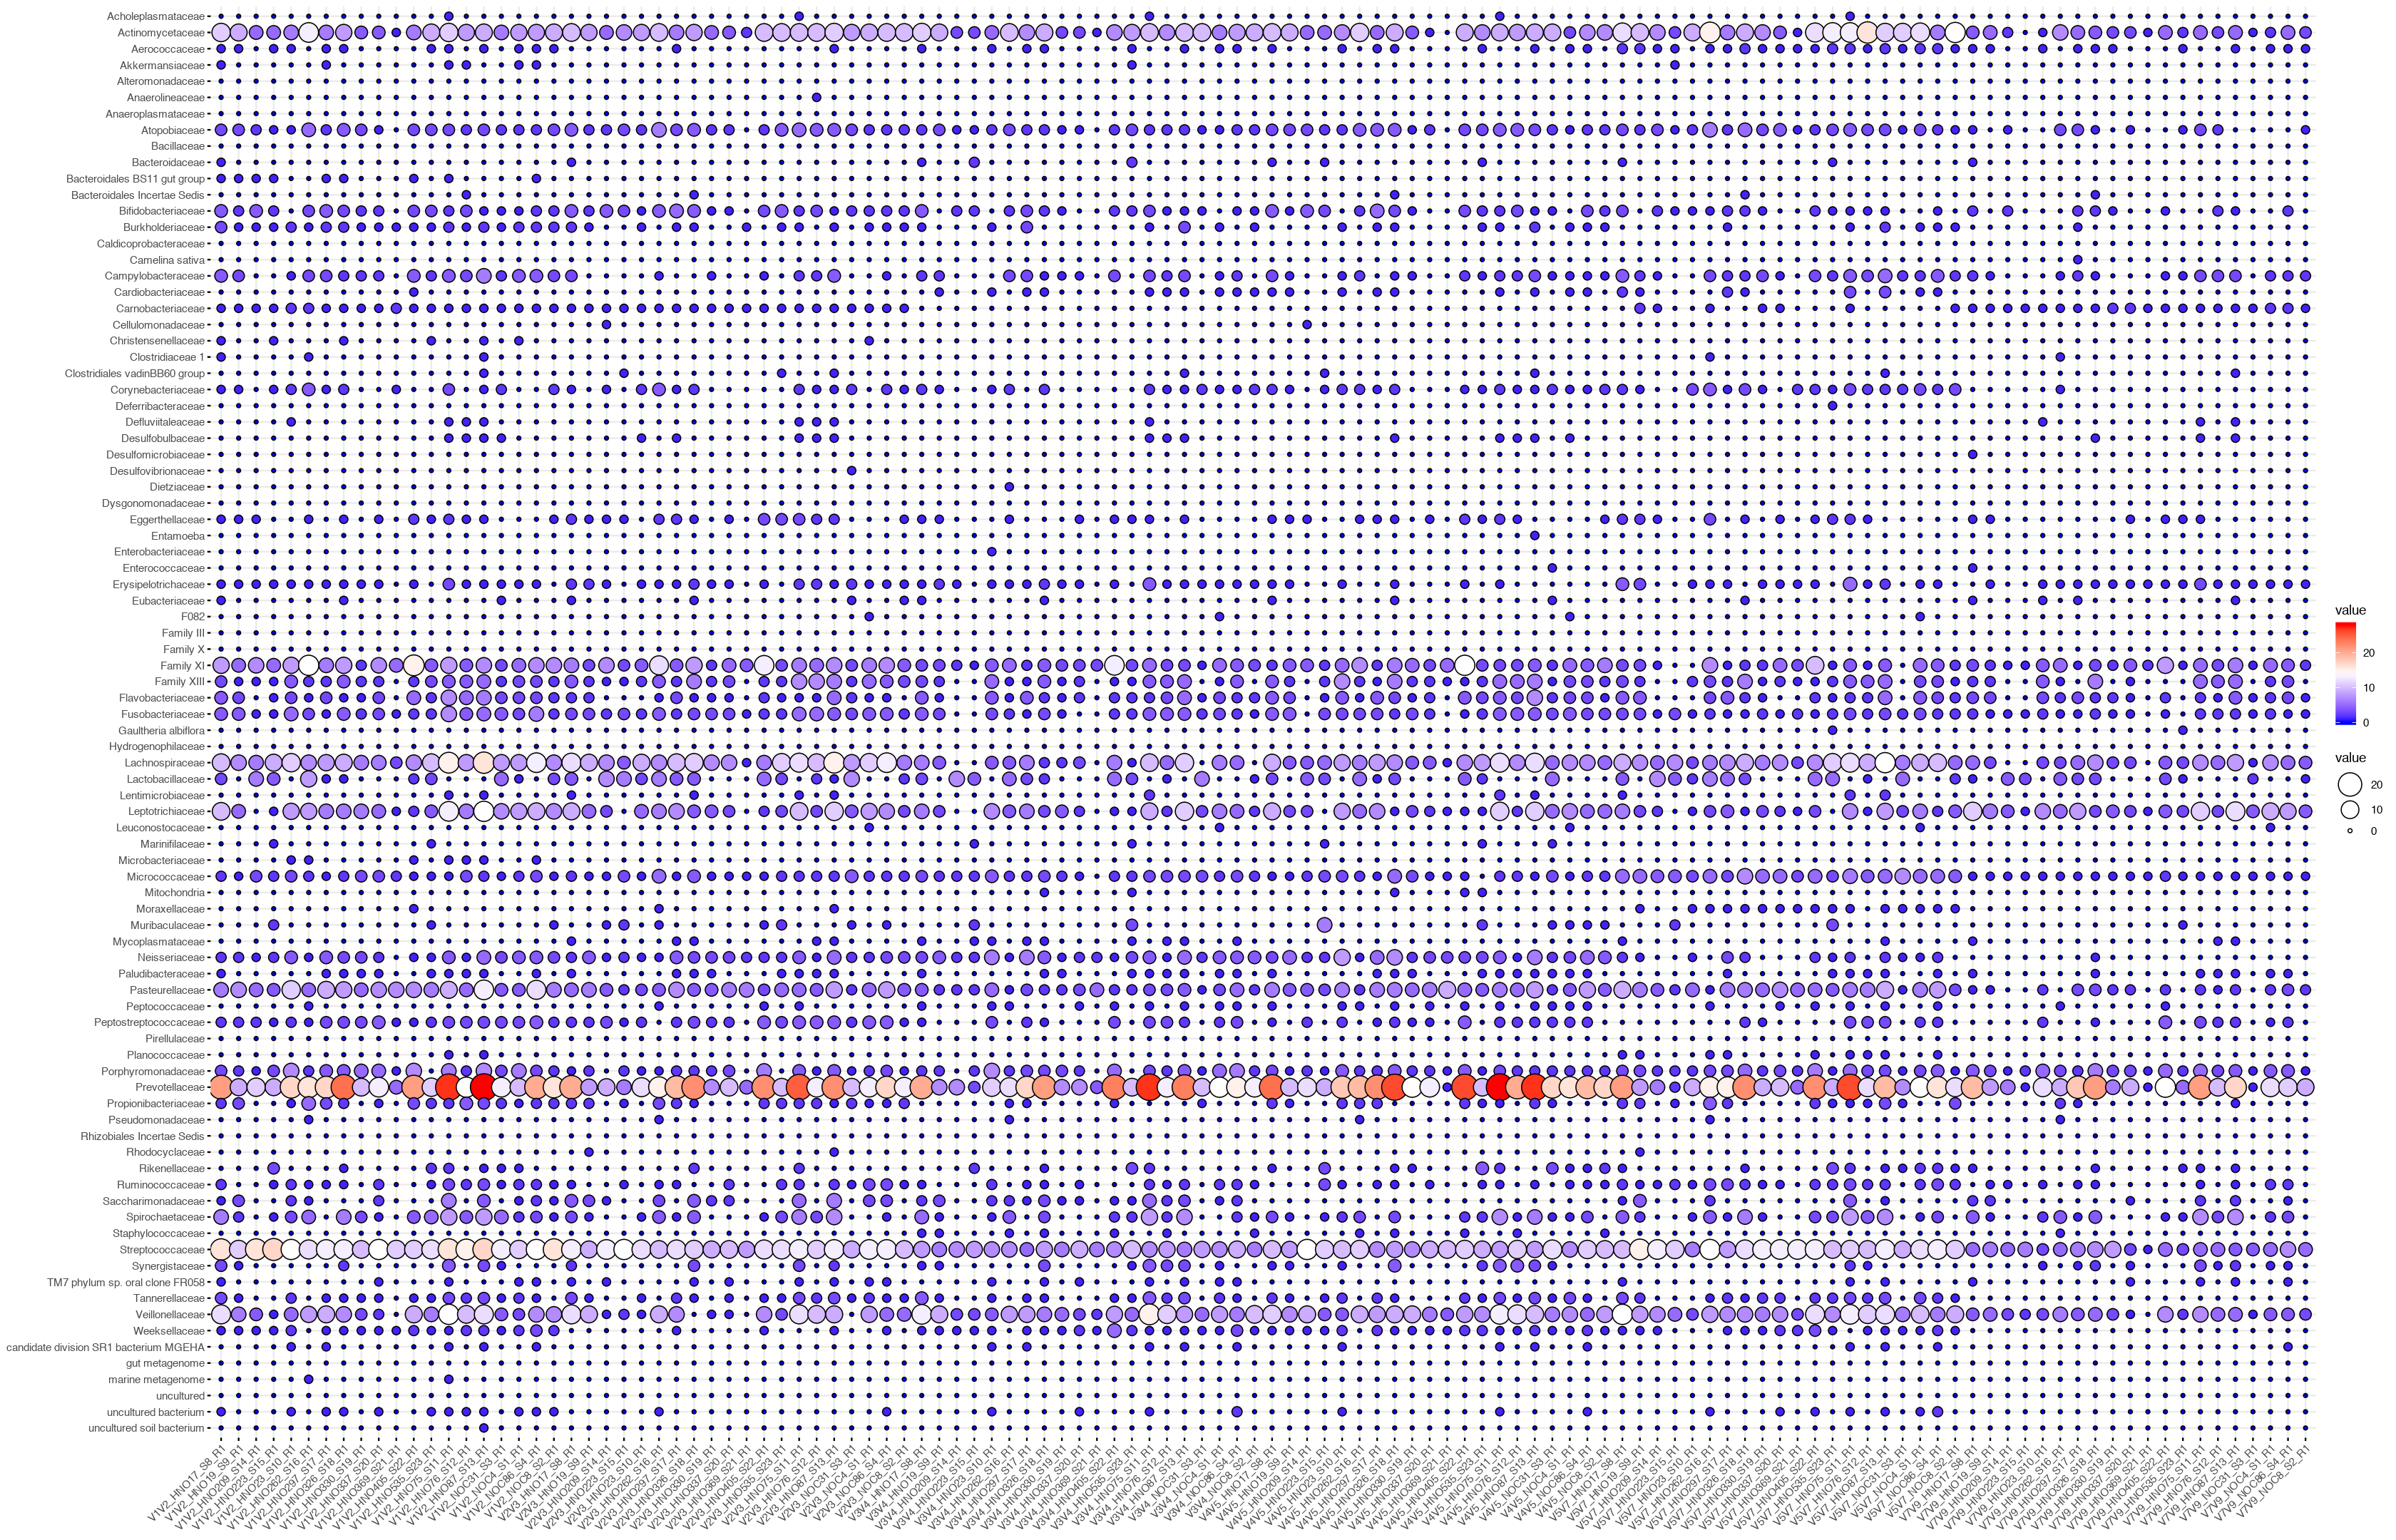

In [11]:
options( repr.plot.width=28, repr.plot.height=18)
ggballoonplot(df2_mat,fill = "value", shape=21) + gradient_fill(c("blue", "white", "red"))

In [12]:
# sets
primer_sets = unique( sapply(strsplit(colnames(df2_mat),'_'),'[[',1) )
primer_sets

[1] "V1V2" "V2V3" "V3V4" "V4V5" "V5V7" "V7V9"

In [13]:
#rowMeans(df2_mat[ , grep( primer_sets[1], colnames(df2_mat))])

In [14]:
new_df = list();
for( i in 1:length(primer_sets) ){
    primer= primer_sets[i]
    print(primer)
    new_df[[primer]] = rowMeans(df2_mat[ , grep( primer, colnames(df2_mat))])
    }

[1] "V1V2"
[1] "V2V3"
[1] "V3V4"
[1] "V4V5"
[1] "V5V7"
[1] "V7V9"


In [15]:
new_df = as.data.frame( new_df )

In [16]:
new_df2 = as.matrix( new_df)
rownames(new_df2) = rownames(new_df)

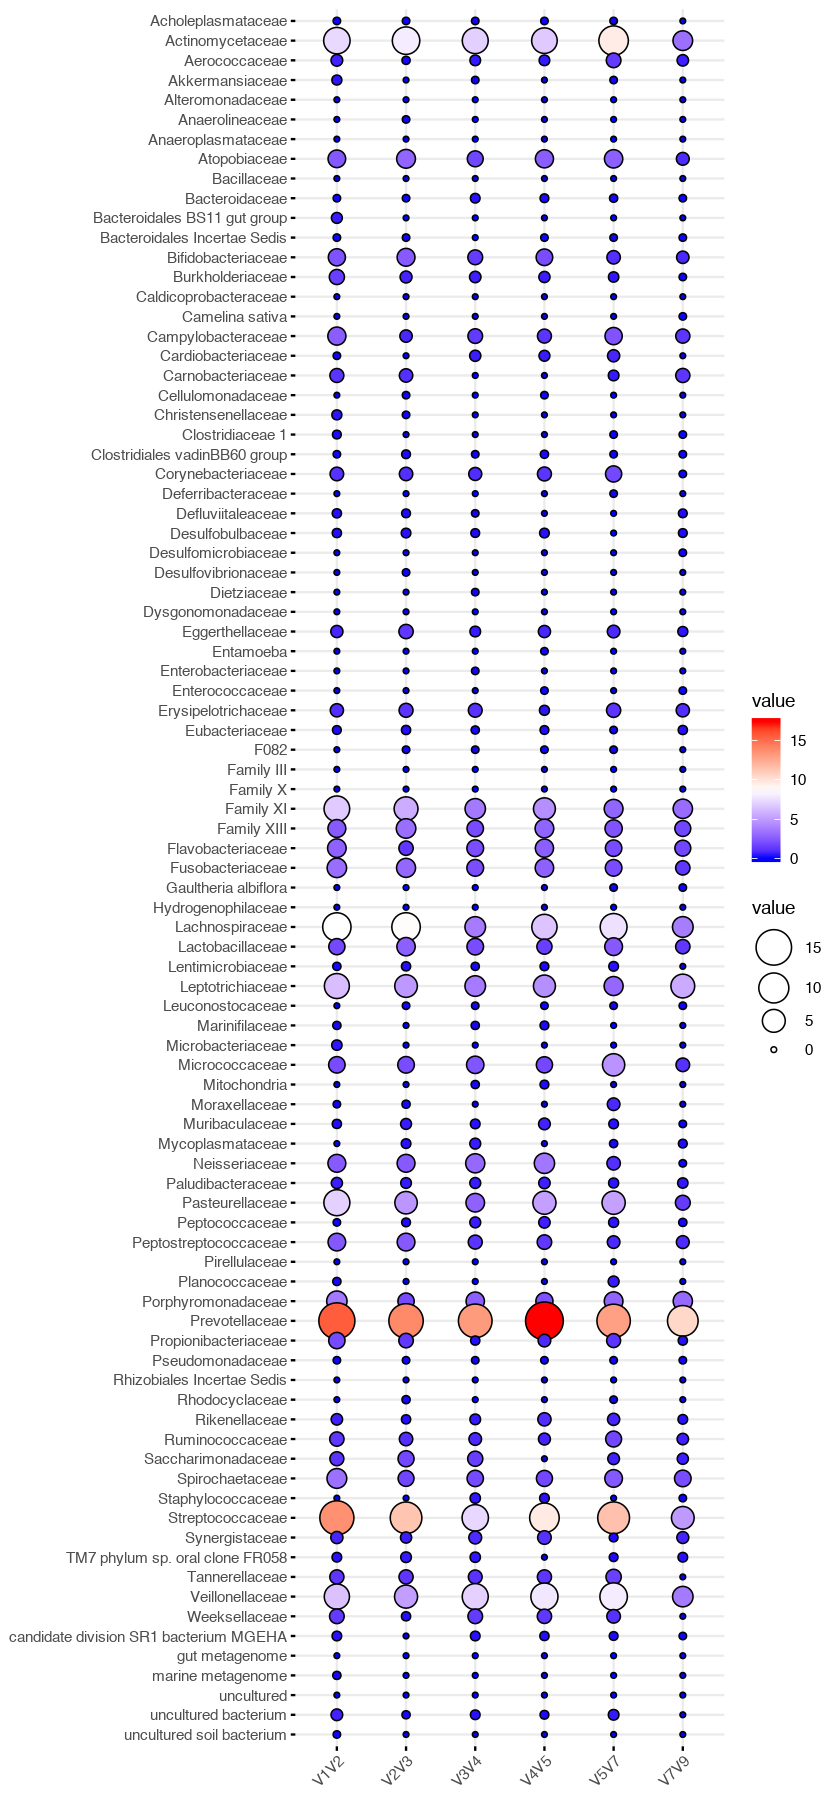

In [17]:
options( repr.plot.width=7, repr.plot.height=15)
ggballoonplot(new_df2,fill = "value", shape=21) + gradient_fill(c("blue", "white", "red"))

In [18]:
dx = as.data.frame( t( df2_mat ) )

In [19]:
dim(dx)

[1] 120  88

In [20]:
dx$group = sapply(strsplit(rownames(dx),'_'),'[',1)

In [21]:
dx %>% head

Acholeplasmataceae Actinomycetaceae Aerococcaceae
V1V2_HNO17_S8_R1   0                  11               1            
V1V2_HNO19_S9_R1   0                   9               1            
V1V2_HNO209_S14_R1 0                   5               0            
V1V2_HNO223_S15_R1 0                   5               1            
V1V2_HNO23_S10_R1  0                   6               1            
V1V2_HNO262_S16_R1 0                  13               0            
                   Akkermansiaceae Alteromonadaceae Anaerolineaceae
V1V2_HNO17_S8_R1   1               0                0              
V1V2_HNO19_S9_R1   0               0                0              
V1V2_HNO209_S14_R1 0               0                0              
V1V2_HNO223_S15_R1 0               0                0              
V1V2_HNO23_S10_R1  0               0                0              
V1V2_HNO262_S16_R1 0               0                0              
                   Anaeroplasmataceae Atopobiaceae Bacillaceae Bacteroidaceae ⋯
V1V2_HNO17_S8_R1   0                  3            0           1              ⋯
V1V2_HNO19_S9_R1   0                  3            0           0              ⋯
V1V2_HNO209_S14_R1 0                  2            0           0              ⋯
V1V2_HNO223_S15_R1 0                  1            0           0              ⋯
V1V2_HNO23_S10_R1  0                  1            0           0              ⋯
V1V2_HNO262_S16_R1 0                  5            0           0              ⋯
                   Tannerellaceae Veillonellaceae Weeksellaceae
V1V2_HNO17_S8_R1   3              12              1            
V1V2_HNO19_S9_R1   1               6              1            
V1V2_HNO209_S14_R1 0               4              1            
V1V2_HNO223_S15_R1 0               1              1            
V1V2_HNO23_S10_R1  2               5              2            
V1V2_HNO262_S16_R1 0               8              0            
                   candidate division SR1 bacterium MGEHA gut metagenome
V1V2_HNO17_S8_R1   0                                      0             
V1V2_HNO19_S9_R1   0                                      0             
V1V2_HNO209_S14_R1 0                                      0             
V1V2_HNO223_S15_R1 0                                      0             
V1V2_HNO23_S10_R1  1                                      0             
V1V2_HNO262_S16_R1 0                                      0             
                   marine metagenome uncultured uncultured bacterium
V1V2_HNO17_S8_R1   0                 0          1                   
V1V2_HNO19_S9_R1   0                 0          0                   
V1V2_HNO209_S14_R1 0                 0          0                   
V1V2_HNO223_S15_R1 0                 0          0                   
V1V2_HNO23_S10_R1  0                 0          1                   
V1V2_HNO262_S16_R1 1                 0          0                   
                   uncultured soil bacterium group
V1V2_HNO17_S8_R1   0                         V1V2 
V1V2_HNO19_S9_R1   0                         V1V2 
V1V2_HNO209_S14_R1 0                         V1V2 
V1V2_HNO223_S15_R1 0                         V1V2 
V1V2_HNO23_S10_R1  0                         V1V2 
V1V2_HNO262_S16_R1 0                         V1V2

In [22]:
dx$taxa = rownames(dx)

In [24]:
rownames(dx) = NULL

In [25]:
dxmelt=melt(dx)

Using group, taxa as id variables


In [26]:
head(dxmelt)

group taxa               variable           value
1 V1V2  V1V2_HNO17_S8_R1   Acholeplasmataceae 0    
2 V1V2  V1V2_HNO19_S9_R1   Acholeplasmataceae 0    
3 V1V2  V1V2_HNO209_S14_R1 Acholeplasmataceae 0    
4 V1V2  V1V2_HNO223_S15_R1 Acholeplasmataceae 0    
5 V1V2  V1V2_HNO23_S10_R1  Acholeplasmataceae 0    
6 V1V2  V1V2_HNO262_S16_R1 Acholeplasmataceae 0

Warning message:
“Removed 15 rows containing missing values (geom_pointrange).”

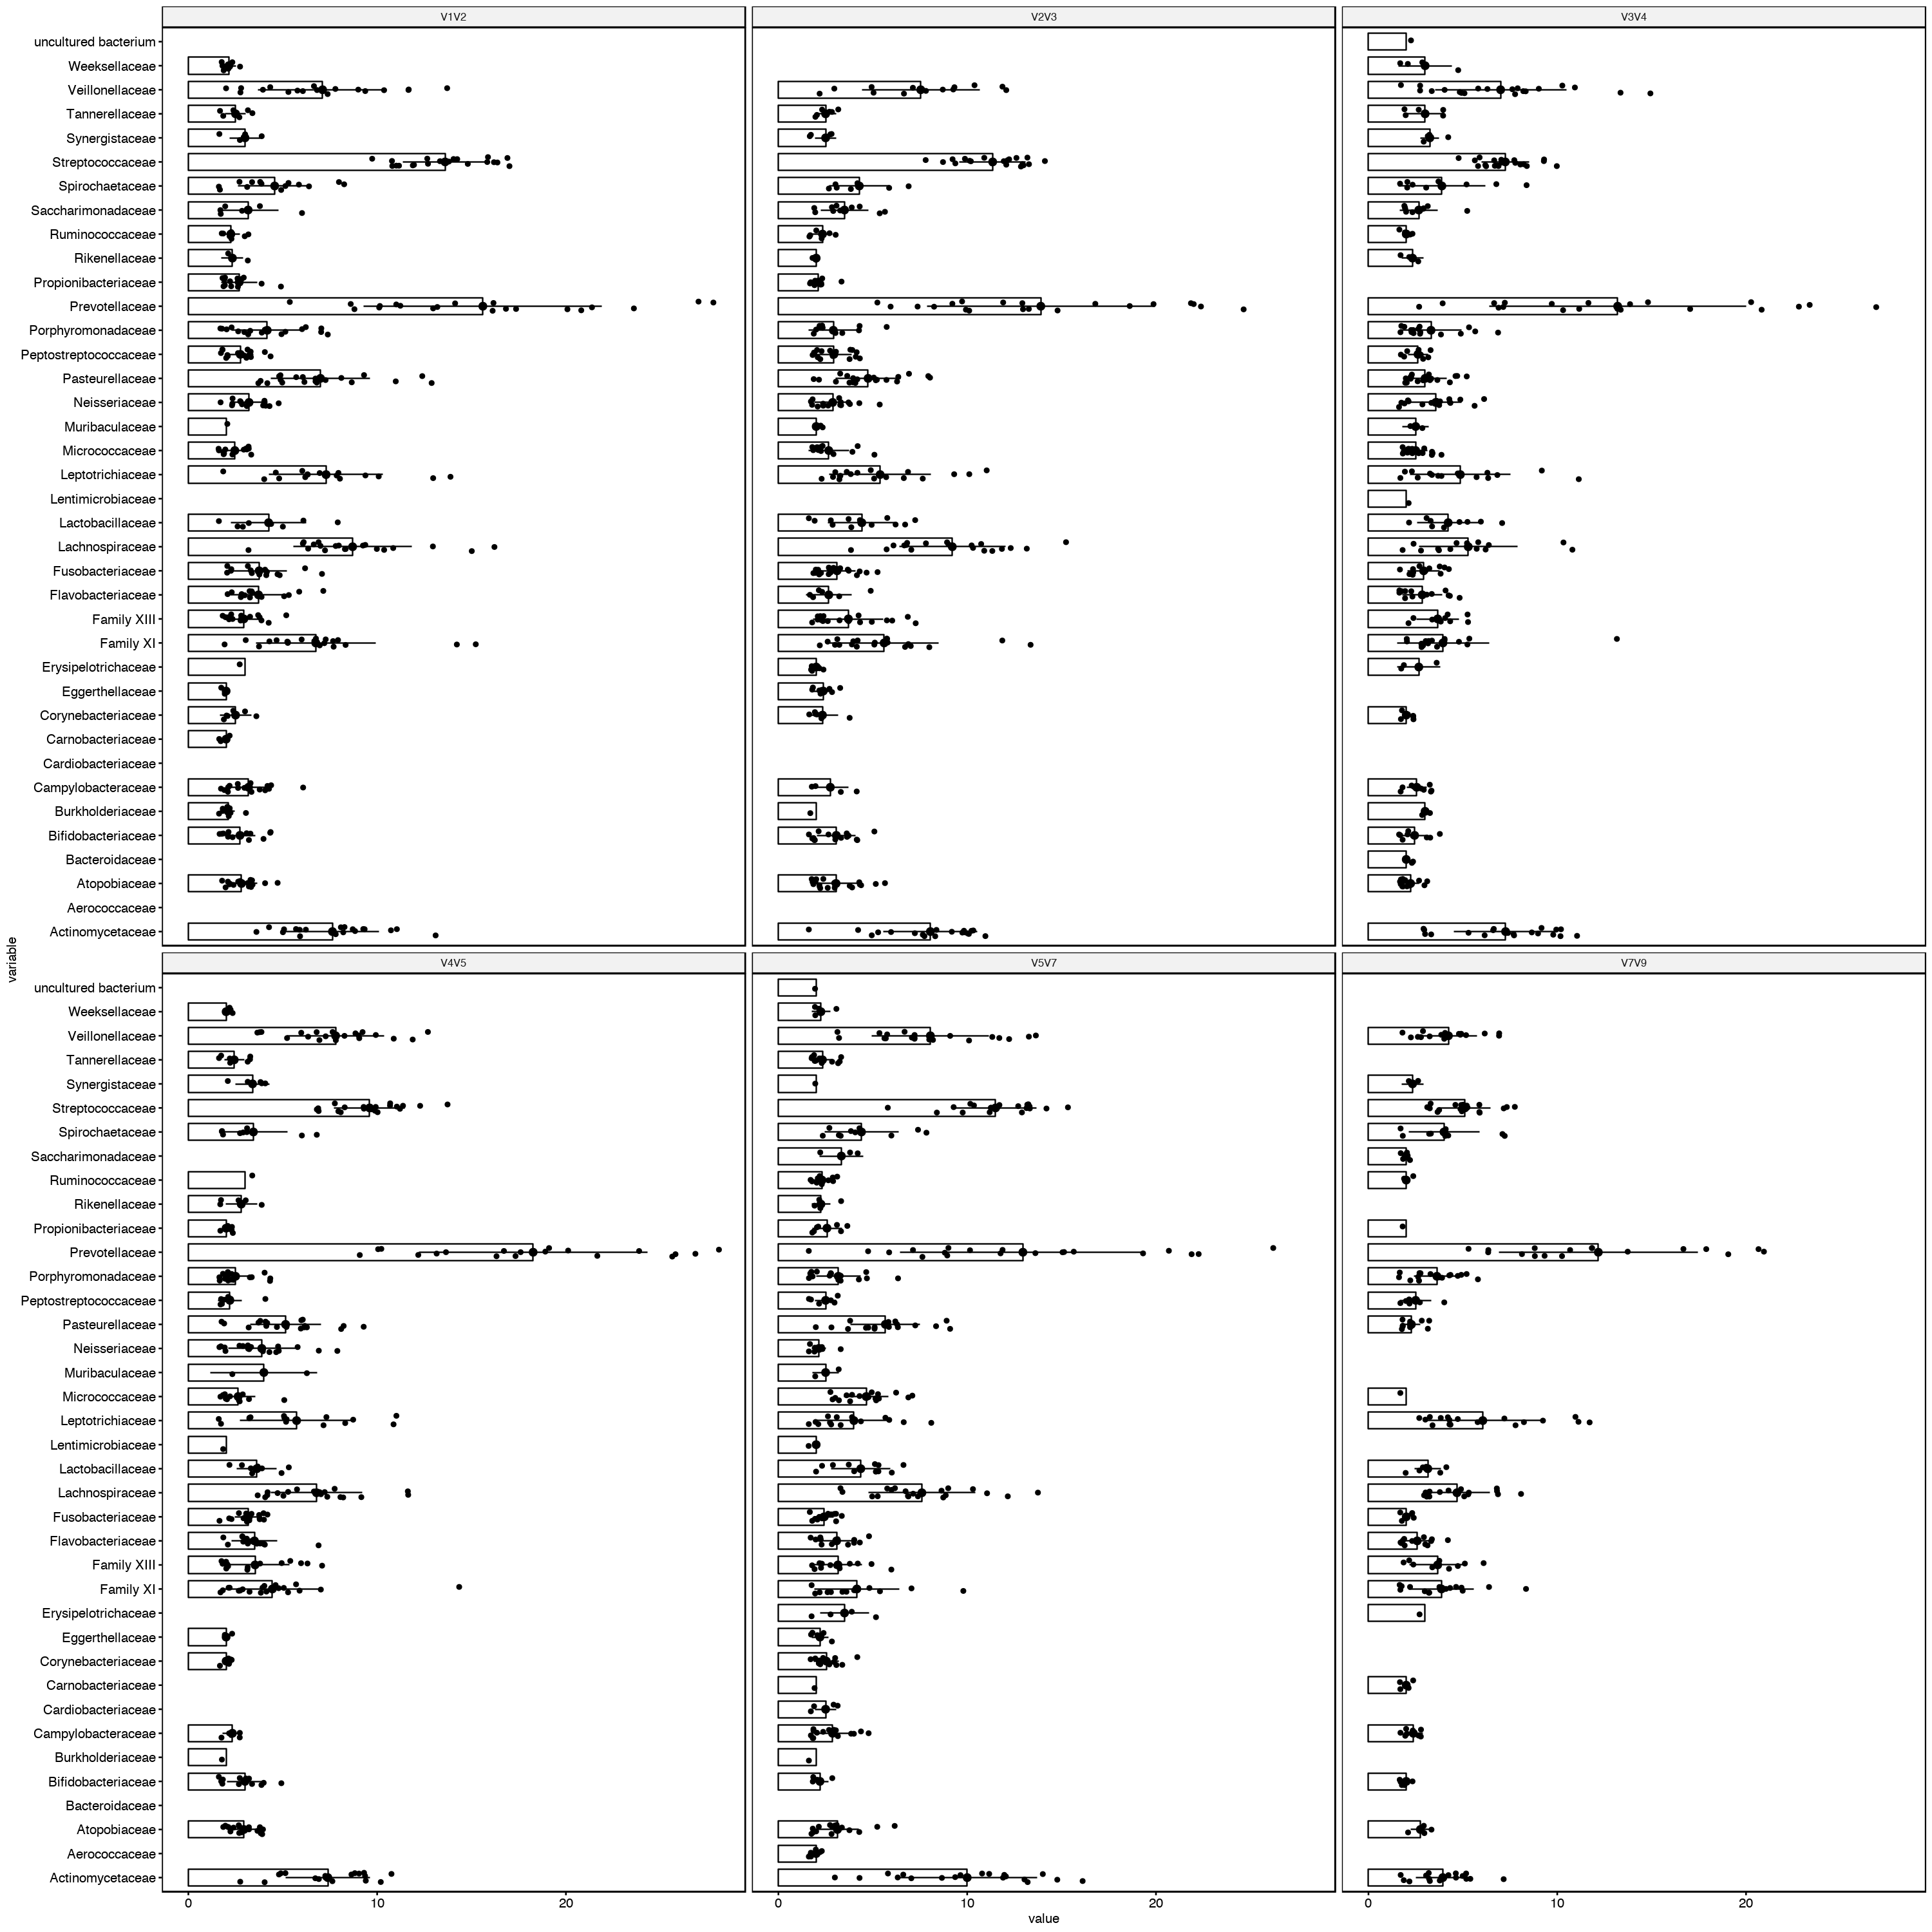

In [45]:
suppressWarnings({
    options( repr.plot.width=25, repr.plot.height=25)
    dxmelt[dxmelt$value >1,] %>% 
    ggbarplot(x = "variable", y = "value", facet.by = "group",
              add = c("mean_sd",'jitter'), 
              error.plot = c("pointrange"), 
              position = position_dodge(), 
              label = FALSE, 
              orientation = "horiz",
              #color = "taxa",
              #palette = c("","","")
             )
})

Warning message:
“Removed 2047 rows containing missing values (geom_pointrange).”

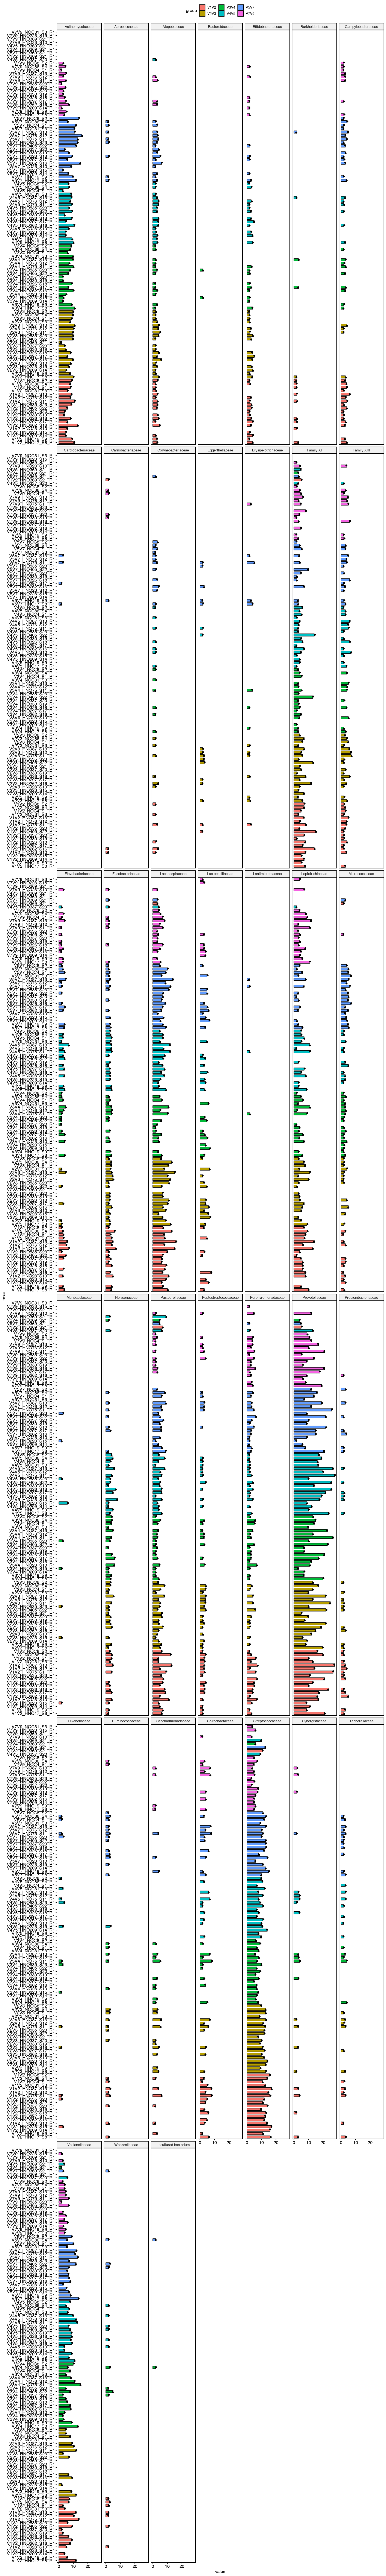

In [46]:
suppressWarnings({
    options( repr.plot.width=15, repr.plot.height=100)
    dxmelt[dxmelt$value > 1,] %>% 
    ggbarplot(x = "taxa", y = "value", facet.by = "variable",fill="group",
              add = c("mean_sd","jitter"), 
              error.plot = c("pointrange"), 
              #position = position_dodge(), 
              label = FALSE, 
              orientation = "horiz",
             )
    })